In [ ]:
# Import package
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
!pip install gdown


In [ ]:
import gdown
import pandas as pd

# URL do arquivo do Google Drive
file_id = '1XmPI-2lh79Ml3dNLFGVtmDlEkWuJWXqg'
url = f'https://drive.google.com/uc?id=1XmPI-2lh79Ml3dNLFGVtmDlEkWuJWXqg'

# Baixar o arquivo
gdown.download(url, 'supermarket_sales.csv', quiet=False)

# Importar os dados com pandas
data = pd.read_csv('supermarket_sales.csv')

# Mostrar as primeiras linhas dos dados
data.head()


Downloading...
From: https://drive.google.com/uc?id=1XmPI-2lh79Ml3dNLFGVtmDlEkWuJWXqg
To: /content/supermarket_sales.csv
100%|██████████| 132k/132k [00:00<00:00, 21.7MB/s]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Carregar os dados do arquivo CSV no DataFrame
df = pd.read_csv('supermarket_sales.csv')

# Exibir as primeiras linhas para confirmar que o DataFrame foi carregado corretamente
print(df.head())

# Informações gerais sobre o DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:
# Remover dados faltantes
df.dropna(inplace=True)

# Remover duplicatas com base no Invoice ID
df.drop_duplicates(subset='Invoice ID', inplace=True)

# Remover duplicatas
df.drop_duplicates(inplace=True)

In [ ]:
# Converter a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Criar a coluna com o formato '05/01/2019' (pt-BR)
df['Date_pt_br'] = df['Date'].dt.strftime('%d/%m/%Y')

# Criar a coluna com o formato '01-05-2019'
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

# Exibir o DataFrame resultante
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Date_pt_br
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,05/01/2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6,08/03/2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,03/03/2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,01-27-2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27/01/2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,08/02/2019


In [ ]:
valor_total_vendas_filial = df.groupby('Branch')['Total'].sum()
print(valor_total_vendas_filial)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [ ]:
media_vendas_cliente = df.groupby('Customer type')['Total'].mean()
print(media_vendas_cliente)

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64


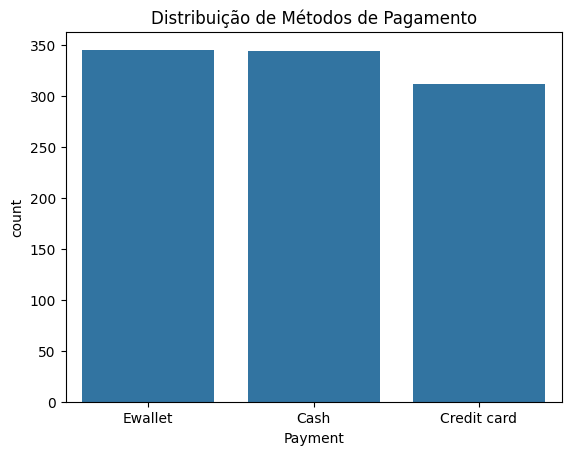

In [ ]:
# Importar a biblioteca seaborn e matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de que o DataFrame 'df' foi carregado corretamente e contém a coluna 'Payment'

# Criar o gráfico de barras para a distribuição dos métodos de pagamento
sns.countplot(x='Payment', data=df)

# Adicionar título ao gráfico
plt.title('Distribuição de Métodos de Pagamento')

# Exibir o gráfico
plt.show()


In [ ]:
valor_venda_media_produto = df.groupby('Product line')['Total'].mean().sort_values(ascending=False)
print(valor_venda_media_produto)

Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64


In [ ]:
lucro_medio_produto = df.groupby('Product line')['gross income'].mean().sort_values(ascending=False)
print(lucro_medio_produto)

Product line
Home and lifestyle        16.030331
Sports and travel         15.812630
Health and beauty         15.411572
Food and beverages        15.365310
Electronic accessories    15.220597
Fashion accessories       14.528062
Name: gross income, dtype: float64


In [ ]:
# Converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

# Definir a coluna 'Date' como índice para facilitar o agrupamento semanal
df.set_index('Date', inplace=True)

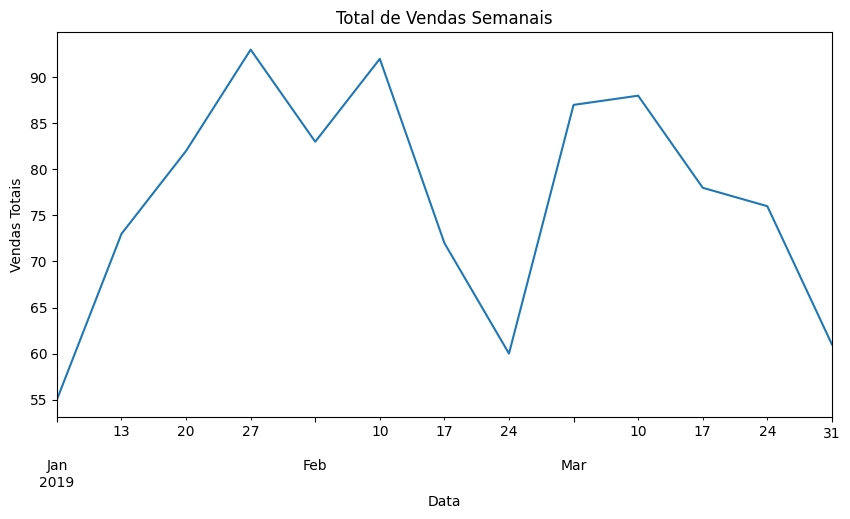

In [ ]:
# Agrupar a quantidade de vendas por semana
qtd_vendas_por_semana = df['Total'].resample('W').count()

# Plotar o total de vendas semanais
qtd_vendas_por_semana.plot(figsize=(10, 5), title="Total de Vendas Semanais")
plt.xlabel("Data")
plt.ylabel("Vendas Totais")
plt.show()

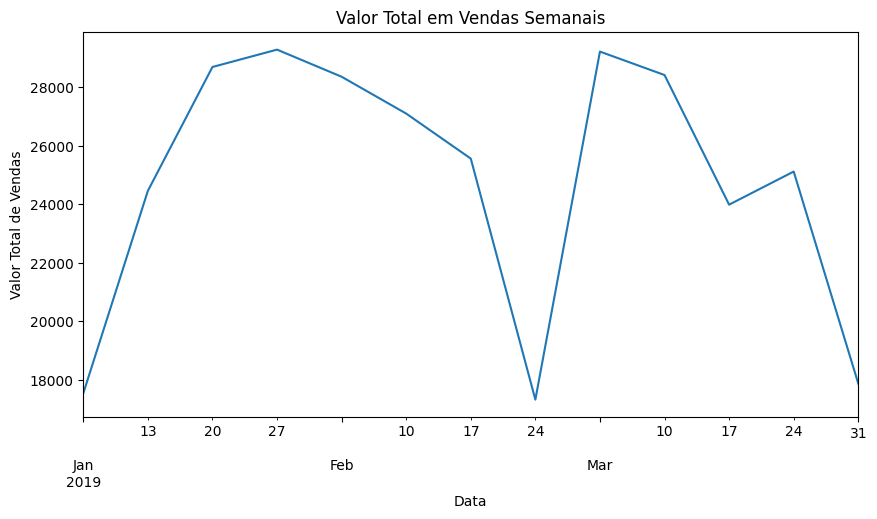

In [ ]:
# Agrupar as vendas totais por semana
valor_vendas_por_semana = df['Total'].resample('W').sum()

# Agrupar a quantidade de vendas por semana
qtd_vendas_por_semana = df['Total'].resample('W').count()

# Plotar o total de vendas semanais
valor_vendas_por_semana.plot(figsize=(10, 5), title="Valor Total em Vendas Semanais")
plt.xlabel("Data")
plt.ylabel("Valor Total de Vendas")
plt.show()